### Unsupervised

In [34]:
from sklearn.datasets import load_breast_cancer

In [35]:
import pandas as pd
import numpy as np

#### Principal Component Analysis

In [36]:
breast_data = load_breast_cancer()

In [37]:
features, label = breast_data.data, breast_data.target

In [38]:
features.shape, label.shape

((569, 30), (569,))

In [39]:
n_rows = features.shape[0]

In [40]:
pd.Series(label).value_counts()

1    357
0    212
dtype: int64

In [41]:
labels = np.reshape(label, (n_rows,1))

In [42]:
final_breast_data = np.concatenate([features,labels], axis=1)

In [43]:
final_breast_data.shape

(569, 31)

In [44]:
breast_dataset = pd.DataFrame(final_breast_data)

In [47]:
features = breast_data.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [48]:
features_labels = np.append(features, 'label')

In [50]:
breast_dataset.columns = features_labels

In [51]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [52]:
breast_dataset['label'].replace(0, 'Benign', inplace=True)
breast_dataset['label'].replace(1, 'Malignant', inplace=True)

In [53]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [54]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:,features].values
x = StandardScaler().fit_transform(x)

In [56]:
x.shape

(569, 30)

In [57]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x, columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [58]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [59]:
principal_breast_DF = pd.DataFrame(data=principalComponents_breast,columns=['principal component 1','principal component 2'])

In [62]:
principal_breast_DF

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [61]:
principal_breast_DF.shape

(569, 2)

In [70]:
pca_breast.explained_variance_ratio_

array([0.44272026, 0.18971182])

Dari keluaran di atas, kita dapat mengamati bahwa principal component 1 menampung 44,2% informasi sedangkan principal component 2 hanya menampung 19% informasi. Juga, hal lain yang perlu diperhatikan adalah saat memproyeksikan data tiga puluh dimensi menjadi data dua dimensi, 36,8% informasi hilang.

In [64]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

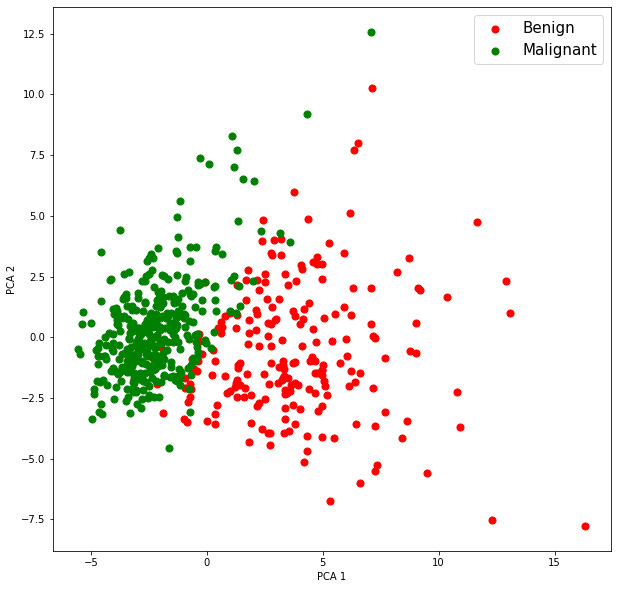

In [69]:
plt.figure(figsize=(10,10))

targets = ['Benign', 'Malignant']
colors = ['r','g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_DF.loc[indicesToKeep, 'principal component 1'], principal_breast_DF.loc[indicesToKeep, 'principal component 2'], c=color, s=50)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.legend(targets,prop={'size':15})
plt.show()

#### K-means

In [71]:
from sklearn.cluster import KMeans

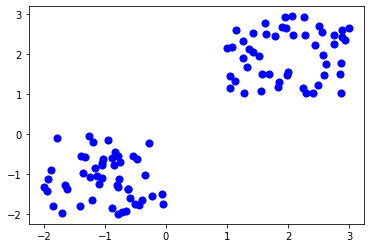

In [72]:
X = -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1

plt.scatter(X[:, 0], X[:,1], s=50, c='b')

C:\Users\62852\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


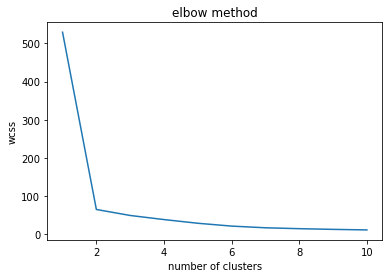

In [78]:
#we can call inertias as wcss
wcss = []

clustering = {}

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    clustering[i] = kmeans
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('elbow method')
plt.ylabel('wcss')
plt.xlabel('number of clusters')
plt.show()

In [79]:
model = clustering[2]

In [80]:
label = model.predict(X)

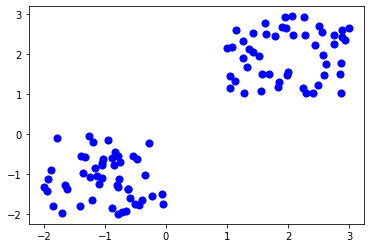

In [81]:
plt.scatter(X[:, 0], X[:,1], s=50, c='b')

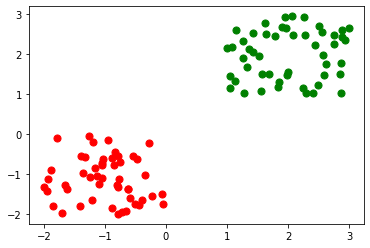

In [83]:
list_label = [0,1]
list_labelcolors = ['r','g']

for target, list_labelcolors in zip(list_label, list_labelcolors):
    indicesToKeep = label == target
    plt.scatter(X[indicesToKeep,0], X[indicesToKeep,1], c=list_labelcolors, s=50)

cara visualisasi cluster kalau fiturnya banyak

1. PCA -> clustering -> visualisasisi PCs + label
2. clustering, dapetin label -> PCA, visulize PCs + label

#### latihan

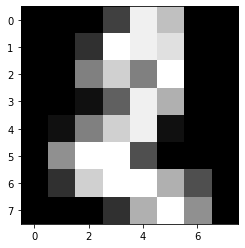

In [84]:
import numpy as np
from sklearn.datasets import load_digits
data, labels = load_digits(return_X_y=True)

plt.imshow(data[2].reshape(8,8),cmap='gray')

### Tasks
### ========
### 1. PCA 2 dimensi, visualize data nya berdasarkan label -> legend: label
### 2. clustering, PCA 2d, visualize -> legend: cluster label

In [88]:
data.shape, labels.shape

((1797, 64), (1797,))

In [89]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [91]:
pd.Series(labels).value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

In [94]:
labels = np.reshape(labels, (labels.shape[0],1))

In [95]:
final_data = np.concatenate([data,labels], axis=1)

In [96]:
df = pd.DataFrame(final_data)

In [97]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [102]:
x = data
x = StandardScaler().fit_transform(x)

In [104]:
x.shape

(1797, 64)

In [105]:
pca_number = PCA(n_components=2)
principalComponents_number = pca_number.fit_transform(x)

In [108]:
principalComponents_number

array([[ 1.91421578, -0.9544943 ],
       [ 0.58897977,  0.92462373],
       [ 1.30204055, -0.31718157],
       ...,
       [ 1.02259994, -0.14789028],
       [ 1.07606251, -0.38089748],
       [-1.25770025, -2.2275732 ]])

In [109]:
pca_df = pd.DataFrame(data=principalComponents_number,columns=['principal component 1','principal component 2'])

In [124]:
pca_df

,principal component 1,principal component 2
0,1.914216,-0.954494
1,0.588980,0.924624
2,1.302041,-0.317182
3,-3.020778,-0.868778
4,4.528949,-1.093462
...,...,...
1792,0.104337,0.255002
1793,2.423236,-1.429617
1794,1.022600,-0.147890
1795,1.076063,-0.380897


In [130]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# digits: 10; # samples: 1797; # features 64


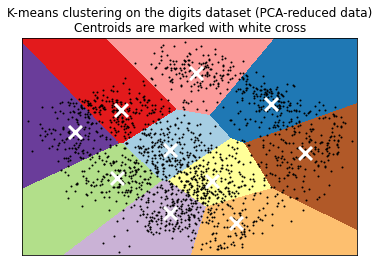

In [131]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()